In [1]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from datetime import timedelta

In [2]:
eeg_recording = pd.read_csv('../Sleep Data/raw_data_1/101/PSG_raw/C3.txt', sep=' ', skiprows=7, header=None)
eeg_recording.columns = ['data']

In [3]:
eeg_numpy = np.array(eeg_recording['data'])

In [4]:
eeg_numpy = eeg_numpy[:-128]

In [5]:
allData = np.array(np.split(eeg_numpy, len(eeg_numpy)/(128*30)))

In [6]:
from scipy.ndimage import gaussian_filter1d

encoded_items = []

def encode_data(index, num_threads, num_filters = 100):
    
    l = threading.Lock()
    
    last = 0
    
    if index == num_threads - 1: last = 1
    
    start = index * int(len(allData)/num_threads)
    end =  last + (index + 1) * int(len(allData)/num_threads)
            
    for data in allData[start:end]:
        item = []        
        for i in range(num_filters):
            y = gaussian_filter1d(data, i + 1)
            item.append(y)
        with l:    
            encoded_items.append(item)
           
    print("Thread: ", index)
    

In [7]:
import threading
import time

start_time = time.time()
    
num_threads = 4

threads = list()
for index in range(num_threads):        
    x = threading.Thread(target=encode_data, args=(index,num_threads))
    threads.append(x)
    x.start()

for index, thread in enumerate(threads):
    thread.join()
        
parallel_time = time.time() - start_time

print(parallel_time)

Thread:  2
Thread:  0
Thread:  3
Thread:  1
33.29731869697571


In [8]:
encoded_items = []

start_time = time.time()
num_filters = 100

for data in allData:
        item = []        
        for i in range(num_filters):
            y = gaussian_filter1d(data, i + 1)
            item.append(y)
           
        encoded_items.append(item)

serial_time = time.time() - start_time

print("Serial time: ", serial_time)

Serial time:  94.67175698280334


In [9]:
print('Speedup: ', serial_time/parallel_time)

Speedup:  2.8432246405294515


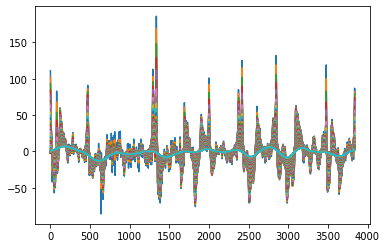

In [18]:
for item in encoded_items[0]:
    plt.plot(item)